In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os

In [2]:
# setting path for the relevant locations
current_dir = os.getcwd()                      # current working directory
parent_dir = os.path.dirname(current_dir)      # parent directory
data_set = parent_dir+'/data'                  # setting the path for data directory
plots = parent_dir+'/plot'                     # setting the path for plot directory

In [3]:
#Reading the dataset and removing irrelevant features
train = pd.read_csv(data_set + '/ClassificationTrain.csv')
train = train.drop(['District'], axis = 1)
train_array = train.drop(['Cost'], axis = 1).to_numpy()

In [4]:
#Spiltting the training data according to classes
c0 = train.loc[train['Cost'] == 0].drop(['Cost'], axis = 1).to_numpy()
c1 = train.loc[train['Cost'] == 1].drop(['Cost'], axis = 1).to_numpy()
c2 = train.loc[train['Cost'] == 2].drop(['Cost'], axis = 1).to_numpy()

In [5]:
#Calciulating mean of points belonging to each class
m0 = np.mean(c0, axis = 0)
m1 = np.mean(c1, axis = 0)
m2 = np.mean(c2, axis = 0)

C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


ZeroDivisionError: division by zero

In [6]:
#Calculating covariance of points belonging to each class and adding them to get sw which is a measure of scatter within classes
sw0 = np.cov(c0.T)
sw1 = np.cov(c1.T)
sw2 = np.cov(c2.T)
sw = sw0 + sw1 + sw2

C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


ZeroDivisionError: division by zero

In [7]:
#Calculating the mean of all data points
m = np.mean(train_array, axis = 0)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [11]:
#Getting number of train points belonging to each class
n0 = len(c0)
n1 = len(c1)
n2 = len(c2)

In [12]:
#Difference of class mean and total mean
m0_m = np.subtract(m0,m)
m1_m = np.subtract(m1,m)
m2_m = np.subtract(m2,m)

In [13]:
#Getting sb which represents the scatter between classes
n=5
sb0 = n0*np.array([[m0_m[i]*m0_m[j] for j in range(n)] for i in range(n)])
sb1 = n1*np.array([[m1_m[i]*m1_m[j] for j in range(n)] for i in range(n)])
sb2 = n2*np.array([[m2_m[i]*m2_m[j] for j in range(n)] for i in range(n)])
sb = sb0 + sb1 + sb2 

In [14]:
#Getting the projection vector w which gives maximum separation between data points
sw_inv = np.linalg.inv(sw) 
A = np.matmul(sw_inv,sb) 
eigval, eigvec = np.linalg.eig(A)
max1 = np.amax(eigval)
for i in range(5):
    if eigval[i] == max1:
        w = eigvec[i]

In [15]:
#Getting the projected points in 1D for each class
wTx_c0 = []
wTx_c1 = []
wTx_c2 = []
for i in c0:
    wTx_c0.append(np.dot(w,i))
for i in c1:
    wTx_c1.append(np.dot(w,i))
for i in c2:
    wTx_c2.append(np.dot(w,i))

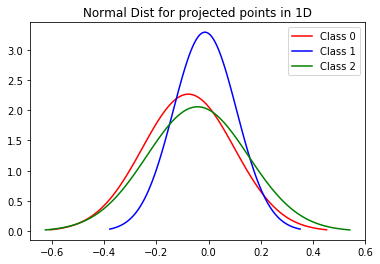

In [16]:
#Plotting normal distribution of projected points in 1D for each class to analyze the class separation
nd0_mean = np.mean(wTx_c0)
nd0_std = np.std(wTx_c0)
nd1_mean = np.mean(wTx_c1)
nd1_std = np.std(wTx_c1)
nd2_mean = np.mean(wTx_c2)
nd2_std = np.std(wTx_c2)
fig = plt.figure()
ax = plt.subplot(111)
x0 = np.linspace(nd0_mean - 3*nd0_std, nd0_mean + 3*nd0_std, 100)
y0 = stats.norm.pdf(x0, nd0_mean, nd0_std)
ax.plot(x0, y0, c= 'r', label = 'Class 0')
x1 = np.linspace(nd1_mean - 3*nd1_std, nd1_mean + 3*nd1_std, 100)
y1 = stats.norm.pdf(x1, nd1_mean, nd1_std)
ax.plot(x1, y1, c= 'b', label = 'Class 1')
x2 = np.linspace(nd2_mean - 3*nd2_std, nd2_mean + 3*nd2_std, 100)
y2 = stats.norm.pdf(x2, nd2_mean, nd2_std)
ax.plot(x2, y2, c= 'g', label = 'Class 2')
ax.legend()
plt.title('Normal Dist for projected points in 1D')
plt.savefig(plots + '/FisherLDA_ProjectedPoints.png')
plt.show()


Since the projected points are not well separated, the Fisher LDA can't be used for Classification.